In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:


In [2]:
import pandas as pd
import os
import xlrd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wavfile
from scipy.signal import butter, lfilter, freqz
import librosa
import librosa.display
import cv2

In [3]:
def Take_Syllables(Syllable_name,Data,Labels):
    ind = Labels == Syllable_name
    Syllables = Data[ind]
    return Syllables, ind

In [4]:
Data_united = np.load('Data_united_unfiltered_128.npy',allow_pickle = True)
Labels_united = np.load('Labels_united_18072021.npy',allow_pickle = True)

#%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/Recordings_ella_ayelet/

#Data_united2 = np.load('total_data_128.npy',allow_pickle = True)
#Labels_united2 = np.load('Labels_total_128.npy',allow_pickle = True)
#Data_united = np.concatenate((Data_united, Data_united2))
#Labels_united = np.concatenate((Labels_united, Labels_united2))


#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#Data_united = np.array([scaler.fit_transform(i) for i in Data_united])


#Data_united = np.repeat(Data_united[:, :, :, np.newaxis], 3, -1)

#Complex_syl = Take_Syllables('Complex',Data_united,Labels_united)
#Complex_syl2 = Take_Syllables('Complex',Data_united2,Labels_united2)

#Frequency_steps_syl = Take_Syllables('Frequency Steps',Data_united,Labels_united)
#Chevron_syl = Take_Syllables('Chevron',Data_united,Labels_united)
#Composite_syl = Take_Syllables('Composite',Data_united,Labels_united)
#Noise_syl = Take_Syllables('99.0',Data_united,Labels_united)
#two_syllable_syl = Take_Syllables('Two-Syllable',Data_united,Labels_united)
#upward_syl = Take_Syllables('Upward',Data_united,Labels_united)
#flat_syl = Take_Syllables('Flat',Data_united,Labels_united)
#short_syl = Take_Syllables('Short',Data_united,Labels_united)
#harmonics_syl = Take_Syllables('Harmonics',Data_united,Labels_united)
#downward_syl = Take_Syllables('Downward',Data_united,Labels_united)
#del Data_united

In [5]:
syl, ind = Take_Syllables('Downward',Data_united,Labels_united)
#syl2 = Take_Syllables('Composite',Data_united2,Labels_united2)

In [6]:
"""
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.pcolormesh(20*np.log10(syl[4]))
#plt.autoscale(enable=False,axis='x')
plt.xticks([])
plt.yticks([])
#plt.xlabel('Time [mSec]', fontsize=16)
#plt.ylabel('Frequency [KHz]', fontsize=16)
"""

"\nfig, ax = plt.subplots(nrows=1, ncols=1)\nax.pcolormesh(20*np.log10(syl[4]))\n#plt.autoscale(enable=False,axis='x')\nplt.xticks([])\nplt.yticks([])\n#plt.xlabel('Time [mSec]', fontsize=16)\n#plt.ylabel('Frequency [KHz]', fontsize=16)\n"

In [7]:
"""
def butter_highpass_filter(cutoff_H, fs, order):
  nyq = 0.5*fs
  normal_cutoff = cutoff_H/nyq
  b, a = butter(order, normal_cutoff, btype='high', analog=False)
  return a, b
  """

"\ndef butter_highpass_filter(cutoff_H, fs, order):\n  nyq = 0.5*fs\n  normal_cutoff = cutoff_H/nyq\n  b, a = butter(order, normal_cutoff, btype='high', analog=False)\n  return a, b\n  "

In [8]:
"""
path1 = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables_new/syllable545'
sr=250000
rec1, sr = librosa.load(path1, sr=sr)
fs = sr
order = 6
cutoff_H = 30*10**3
a, b = butter_highpass_filter(cutoff_H, fs, order)
rec1f = rec1 - np.mean(rec1)
rec1f = lfilter(b, a, rec1f)
print(Labels_united[545])
"""

"\npath1 = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables_new/syllable545'\nsr=250000\nrec1, sr = librosa.load(path1, sr=sr)\nfs = sr\norder = 6\ncutoff_H = 30*10**3\na, b = butter_highpass_filter(cutoff_H, fs, order)\nrec1f = rec1 - np.mean(rec1)\nrec1f = lfilter(b, a, rec1f)\nprint(Labels_united[545])\n"

In [9]:
"""
N = len(rec1)

yf = fft(rec1)
xf = fftfreq(N, 1 / sr)

plt.plot(xf, np.abs(yf))
plt.xlim(0, 120000)
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.yticks([])
plt.show()
"""

"\nN = len(rec1)\n\nyf = fft(rec1)\nxf = fftfreq(N, 1 / sr)\n\nplt.plot(xf, np.abs(yf))\nplt.xlim(0, 120000)\nplt.xlabel('Frequency [Hz]', fontsize=14)\nplt.ylabel('Magnitude', fontsize=14)\nplt.yticks([])\nplt.show()\n"

In [10]:
"""
N = len(rec1f)

yf = fft(rec1f)
xf = fftfreq(N, 1 / sr)

plt.plot(xf, np.abs(yf))
plt.xlim(0, 120000)
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.yticks([])
plt.show()
"""

"\nN = len(rec1f)\n\nyf = fft(rec1f)\nxf = fftfreq(N, 1 / sr)\n\nplt.plot(xf, np.abs(yf))\nplt.xlim(0, 120000)\nplt.xlabel('Frequency [Hz]', fontsize=14)\nplt.ylabel('Magnitude', fontsize=14)\nplt.yticks([])\nplt.show()\n"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


IndexError: ignored

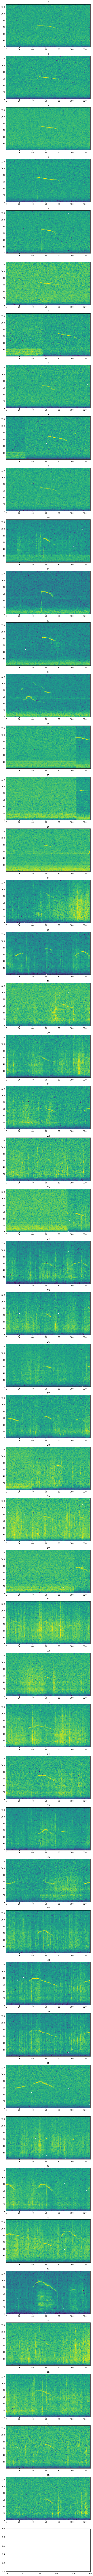

In [11]:
fig, ax = plt.subplots(nrows=50, ncols=1, figsize=(8,250))
ax = ax.ravel()
size = 0
for i in range(size, size+50):
  ax[i-size].pcolormesh(20*np.log10(syl[i]))
  ax[i-size].set_title(str(i))
#  plt.savefig(['two'+i])

In [ ]:
#fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
#ax[0, 0].pcolormesh(20*np.log10(syl[0]))
#ax[0, 1].pcolormesh(20*np.log10(syl2[0]))
#ax[1, 0].pcolormesh(20*np.log10(syl[1]))
#ax[1, 1].pcolormesh(20*np.log10(syl2[1]))
#ax[2, 0].pcolormesh(20*np.log10(syl[2]))
#ax[2, 1].pcolormesh(20*np.log10(syl2[2]))
#ax[3, 0].pcolormesh(20*np.log10(syl[3]))
#ax[3, 1].pcolormesh(20*np.log10(syl2[3]))
#ax[4, 0].pcolormesh(20*np.log10(syl[4]))
#ax[4, 1].pcolormesh(20*np.log10(syl2[4]))

In [ ]:
#print(Labels_united)